<a href="https://colab.research.google.com/github/Emmanuel-9/myPersonalityTrait/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing Modules**

In [224]:
import sys
!{sys.executable} -m pip install numpy
import sys
!{sys.executable} -m pip install pandas
import sys
!{sys.executable} -m pip install seaborn
import sys
!{sys.executable} -m pip install matplotlib
import sys
!{sys.executable} -m pip install WordCloud
import sys
!{sys.executable} -m pip install TextBlob
import sys
!{sys.executable} -m pip install nltk
import sys
!{sys.executable} -m pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importing** **Modules**

In [225]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# **Uploading** **the** **dataset**

In [226]:
from google.colab import files
uploaded = files.upload()


Saving Twitter_Data.csv to Twitter_Data (1).csv


Loading the dataset

In [227]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Twitter_Data.csv']))

In [228]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [230]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [231]:
df.columns

Index(['clean_text', 'category'], dtype='object')

In [232]:
text_df = df.drop(['category'], axis=1)
text_df.head()

,clean_text
0,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...


In [233]:
print(text_df['clean_text'].iloc[0],"\n")
print(text_df['clean_text'].iloc[1],'\n')
print(text_df['clean_text'].iloc[2],'\n')
print(text_df['clean_text'].iloc[3],'\n')
print(text_df['clean_text'].iloc[4],'\n')



when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples 

talk all the nonsense and continue all the drama will vote for modi  

what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax 

asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars 

answer who among these the most powerful world leader today trump putin modi may  



In [234]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162976 non-null  object
dtypes: object(1)
memory usage: 1.2+ MB


# **Preprocessing the dataset**





In [235]:
def data_processing(clean_text):
  clean_text = str(clean_text).lower()
  clean_text = re.sub(r"https\S+|www\S+https\S+", '', clean_text, flags=re.MULTILINE)
  clean_text = re.sub(r'\@w+|\#','',clean_text)
  clean_text = re.sub(r'[^\w\s]','',clean_text)
  text_tokens = word_tokenize(clean_text)
  filtered_text = [w for w in text_tokens if not w in stop_words]
  return "".join(filtered_text)


In [236]:
text_df.text = text_df['clean_text'].apply(data_processing)

In [237]:
text_df = text_df.drop_duplicates('clean_text')

In [238]:
stemmer = PorterStemmer()
def stemming(data):
  clean_text = clean_text.apply(lambda data: [stemmer.stem(word) for word in data])
  return data

In [239]:
text_df['clean_text'] = text_df['clean_text']

In [240]:
text_df.head()

,clean_text
0,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...


In [241]:
print(text_df['clean_text'].iloc[0],"\n")
print(text_df['clean_text'].iloc[1],'\n')
print(text_df['clean_text'].iloc[2],'\n')
print(text_df['clean_text'].iloc[3],'\n')
print(text_df['clean_text'].iloc[4],'\n')

when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples 

talk all the nonsense and continue all the drama will vote for modi  

what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax 

asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars 

answer who among these the most powerful world leader today trump putin modi may  



In [242]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162977 entries, 0 to 162979
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  162976 non-null  object
dtypes: object(1)
memory usage: 2.5+ MB


# **Exploratory Data Analysis**

In [243]:
def polarity(clean_text):
  return TextBlob(str(clean_text)).sentiment.polarity

In [244]:
text_df['polarity'] = text_df['clean_text'].apply(polarity)

In [248]:
text_df.head()

,clean_text,polarity
0,when modi promised “minimum government maximum...,-0.300000
1,talk all the nonsense and continue all the dra...,0.000000
2,what did just say vote for modi welcome bjp t...,0.483333
3,asking his supporters prefix chowkidar their n...,0.150000
4,answer who among these the most powerful world...,0.400000


In [250]:
def sentiment(label):
  if label < 0:
    return "Negative"
  elif label == 0:
    return "Neutral"  
  elif label > 0:
    return "Positive"  


In [251]:
text_df["sentiment"] = text_df["polarity"].apply(sentiment)

In [253]:
text_df.head()

,clean_text,polarity,sentiment
0,when modi promised “minimum government maximum...,-0.300000,Negative
1,talk all the nonsense and continue all the dra...,0.000000,Neutral
2,what did just say vote for modi welcome bjp t...,0.483333,Positive
3,asking his supporters prefix chowkidar their n...,0.150000,Positive
4,answer who among these the most powerful world...,0.400000,Positive


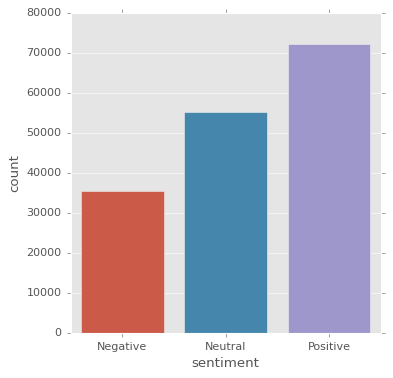

In [254]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

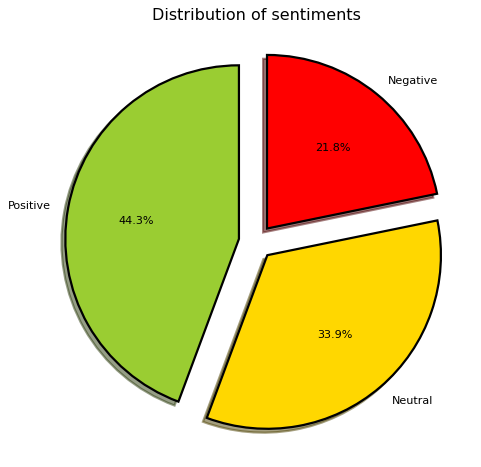

In [255]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth': 2, 'edgecolor': "black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
          startangle= 90, wedgeprops= wp, explode = explode, label = '')
plt.title('Distribution of sentiments')

In [256]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending = False)
pos_tweets.head()

,clean_text,polarity,sentiment
18443,the best for reject kyun,1.0,Positive
109131,narender modi the best option for india,1.0,Positive
92117,sir think modi govt gadkari the best minister,1.0,Positive
12864,you were very happy today but every day target...,1.0,Positive
74200,modi aik aur jhoot thought indian are very in...,1.0,Positive


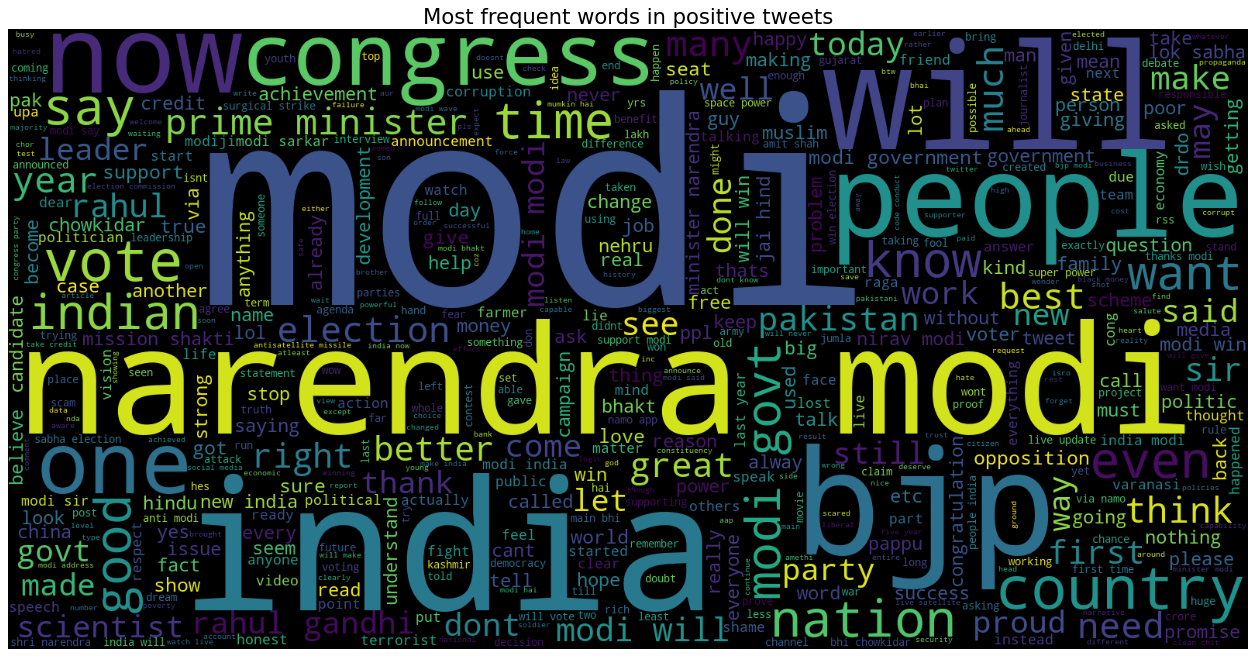

In [259]:
clean_text = ' '.join([word for word in pos_tweets['clean_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words = 500, width = 1600, height = 800).generate(clean_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [260]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending = False)
neg_tweets.head()

,clean_text,polarity,sentiment
22579,wins round two ttv dinakaran after nagar thoug...,-2.775558e-18,Negative
108050,its price paid indianehru thought became noble...,-2.775558e-18,Negative
131919,for getting respect people should give respect...,-2.775558e-18,Negative
32661,too dangerous too good gokhele said about maha...,-4.625929e-18,Negative
104361,poor modi repeatedly pausing like vajpayee eli...,-4.625929e-18,Negative


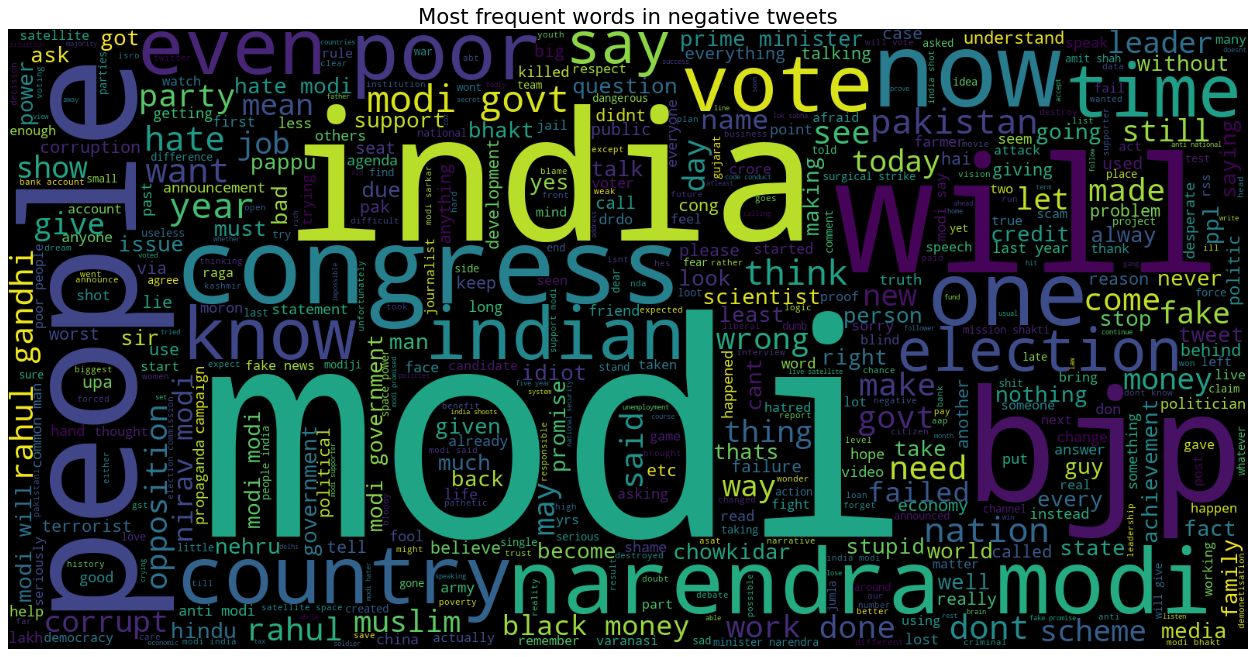

In [261]:
clean_text = ' '.join([word for word in neg_tweets['clean_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words = 500, width = 1600, height = 800).generate(clean_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [262]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending = False)
neutral_tweets.head()

,clean_text,polarity,sentiment
1,talk all the nonsense and continue all the dra...,0.0,Neutral
108914,\nmodi …you said you will give tax incentives ...,0.0,Neutral
108918,and read the speech mohd modi gave british par...,0.0,Neutral
108920,its not arnab modi questioning modiji,0.0,Neutral
108926,elections 2019 modi sounds poll bugle takes sw...,0.0,Neutral


In [263]:
clean_text = ' '.join([word for word in neutral_tweets['clean_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(clean_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

TypeError: ignored

# **Feature Extraction**

In [264]:
vect = CountVectorizer(ngram_range = (1,2)).fit(text_df['clean_text'].values.astype('U'))

In [265]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 1199726

First 20 features:
 ['000', '000 00000', '000 21000', '000 333', '000 buy', '000 clean', '000 crore', '000 crs', '000 death', '000 deaths', '000 each', '000 from', '000 income', '000 knowledge', '000 modi', '000 month', '000 out', '000 per', '000 poor', '000 the']


# **Model Training**

In [212]:
X = text_df['clean_text']
Y = text_df['sentiment']
X = vect.transform(X.values.astype('U'))

In [213]:
x_train, x_test, y_train, y_test, = train_test_split(X, Y, test_size=0.2, random_state=42)

In [214]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (x_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (x_test.shape))

Size of x_train: (130381, 1199726)
Size of y_train: (130381, 1199726)
Size of x_test: (32596, 1199726)
Size of y_test: (32596, 1199726)


In [215]:
import warnings
warnings.filterwarnings('ignore')

In [216]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 93.55%


In [217]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 6115   403   608]
 [   87 10817   142]
 [  444   418 13562]]


              precision    recall  f1-score   support

    Negative       0.92      0.86      0.89      7126
     Neutral       0.93      0.98      0.95     11046
    Positive       0.95      0.94      0.94     14424

    accuracy                           0.94     32596
   macro avg       0.93      0.93      0.93     32596
weighted avg       0.94      0.94      0.94     32596



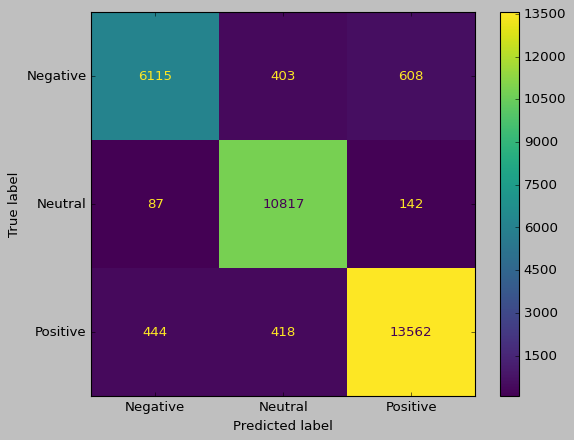

In [218]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = logreg.classes_)
disp.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [219]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 93.93%


In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 6181   359   586]
 [   89 10813   144]
 [  433   366 13625]]


              precision    recall  f1-score   support

    Negative       0.92      0.87      0.89      7126
     Neutral       0.94      0.98      0.96     11046
    Positive       0.95      0.94      0.95     14424

    accuracy                           0.94     32596
   macro avg       0.94      0.93      0.93     32596
weighted avg       0.94      0.94      0.94     32596



In [220]:
from sklearn.svm import LinearSVC

In [221]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [ ]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 94.66%


In [222]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 6288   285   553]
 [   94 10835   117]
 [  408   285 13731]]


              precision    recall  f1-score   support

    Negative       0.93      0.88      0.90      7126
     Neutral       0.95      0.98      0.97     11046
    Positive       0.95      0.95      0.95     14424

    accuracy                           0.95     32596
   macro avg       0.94      0.94      0.94     32596
weighted avg       0.95      0.95      0.95     32596



In [223]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [173]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 1}


In [174]:
y_pred = grid.predict(x_test)

In [175]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 94.66%


In [176]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 6288   285   553]
 [   94 10835   117]
 [  408   285 13731]]


              precision    recall  f1-score   support

    Negative       0.93      0.88      0.90      7126
     Neutral       0.95      0.98      0.97     11046
    Positive       0.95      0.95      0.95     14424

    accuracy                           0.95     32596
   macro avg       0.94      0.94      0.94     32596
weighted avg       0.95      0.95      0.95     32596

